In [315]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [316]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [317]:
#replacing the names with 0, 1, 2
df['Name'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0, 1, 2], inplace=True)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


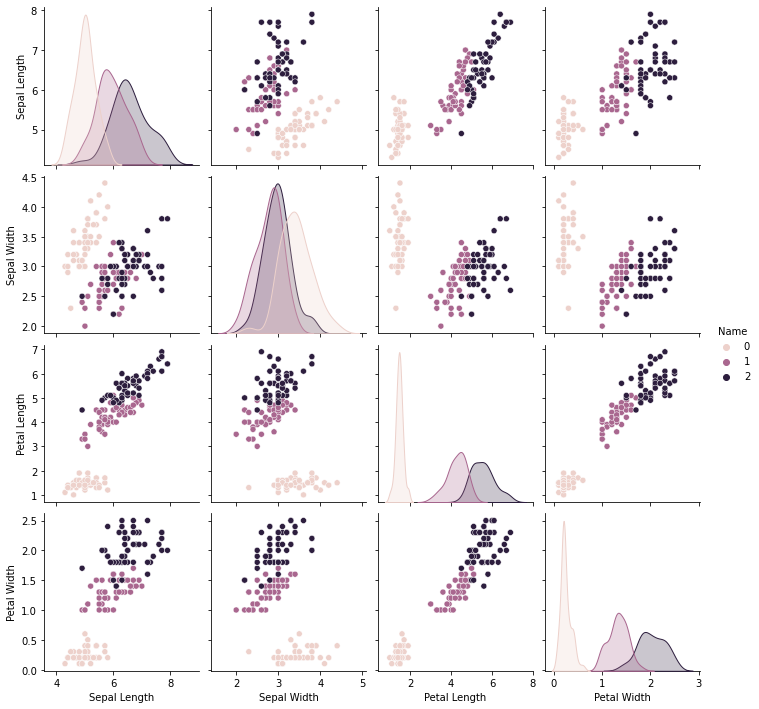

In [318]:
#1.1.1 - The three classes seem to be mostly well separated, especially cluster 0, as you can see in the graph it seems to
#have high intra-class similarity(intra-cluster distances minimized) and low inter-class similarity (inter-cluster distances
#maximized). Clusters 1 and 2 are a little less well separated, which can clearly be seen in the second graph in the first
#row (sepal width vs sepal length) and the first graph in the second row (sepal length vs sepal width) which show a lot of
#overlapping cluster points in the graph. 
import seaborn as sns
sns.pairplot(df, hue = 'Name')

In [319]:
from sklearn.cluster import KMeans
df_features = df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].values
df_features
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_features)

KMeans(n_clusters=3)

In [320]:
import matplotlib.pyplot as plt

In [321]:
#print clusters
clusters = kmeans.cluster_centers_
print(clusters)

[[5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


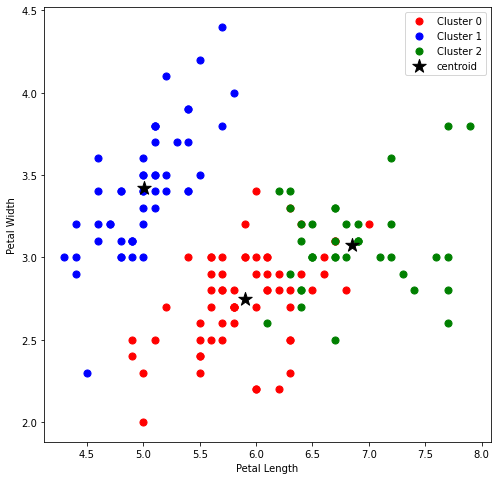

In [322]:
#1.1.2
y_kmeans = kmeans.fit_predict(df_features)
plt.figure(figsize=(8, 8))
plt.scatter(df_features[y_kmeans == 0, 0], df_features[y_kmeans == 0, 1], s=50, c = 'red', label='Cluster 0')
plt.scatter(df_features[y_kmeans == 1, 0], df_features[y_kmeans == 1, 1], s=50, c = 'blue', label = 'Cluster 1')
plt.scatter(df_features[y_kmeans == 2, 0], df_features[y_kmeans == 2, 1], s=50, c = 'green', label = 'Cluster 2')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, c='black', label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [323]:
#1.1.3 - For clusters 0 and 1, it seems that all the instances (62 and 50 respectively) belong to an incorrect class. For 
#cluster 2, most of the instances belong to the same class (only 2 don't), which is good. None of the cluster labels 
#perfectly correspond to a class label. These observations don't agree with the scatter matrix. 
pd.crosstab(df['Name'], y_kmeans)

col_0,0,1,2
Name,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [324]:
#1.2.1
from sklearn.feature_selection import mutual_info_regression
new_df = df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
final_df = pd.DataFrame({'Sepal Length' : [0, 0, 0, 0],
                       'Sepal Width' : [0, 0, 0, 0],
                       'Petal Length' : [0, 0, 0, 0],
                       'Petal Width' : [0, 0, 0, 0]})
final_df
for i in range(4):
    for j in range(4):
        x = new_df.iloc[:, [i]]
        y = new_df.iloc[:, [j]]
        mi = mutual_info_regression(x, y)
        final_df.iloc[i, [j]] = mi
final_df_two = final_df.rename(index={0: 'Sepal Length',
                                     1: 'Sepal Width',
                                     2: 'Petal Length',
                                     3: 'Petal Width'})
final_df_two

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.191519,0.310975,0.888533,0.647721
Sepal Width,0.296280,2.713641,0.337907,0.423993
Petal Length,0.889873,0.346584,3.118659,1.270409
Petal Width,0.609494,0.438570,1.209459,2.755095


In [325]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

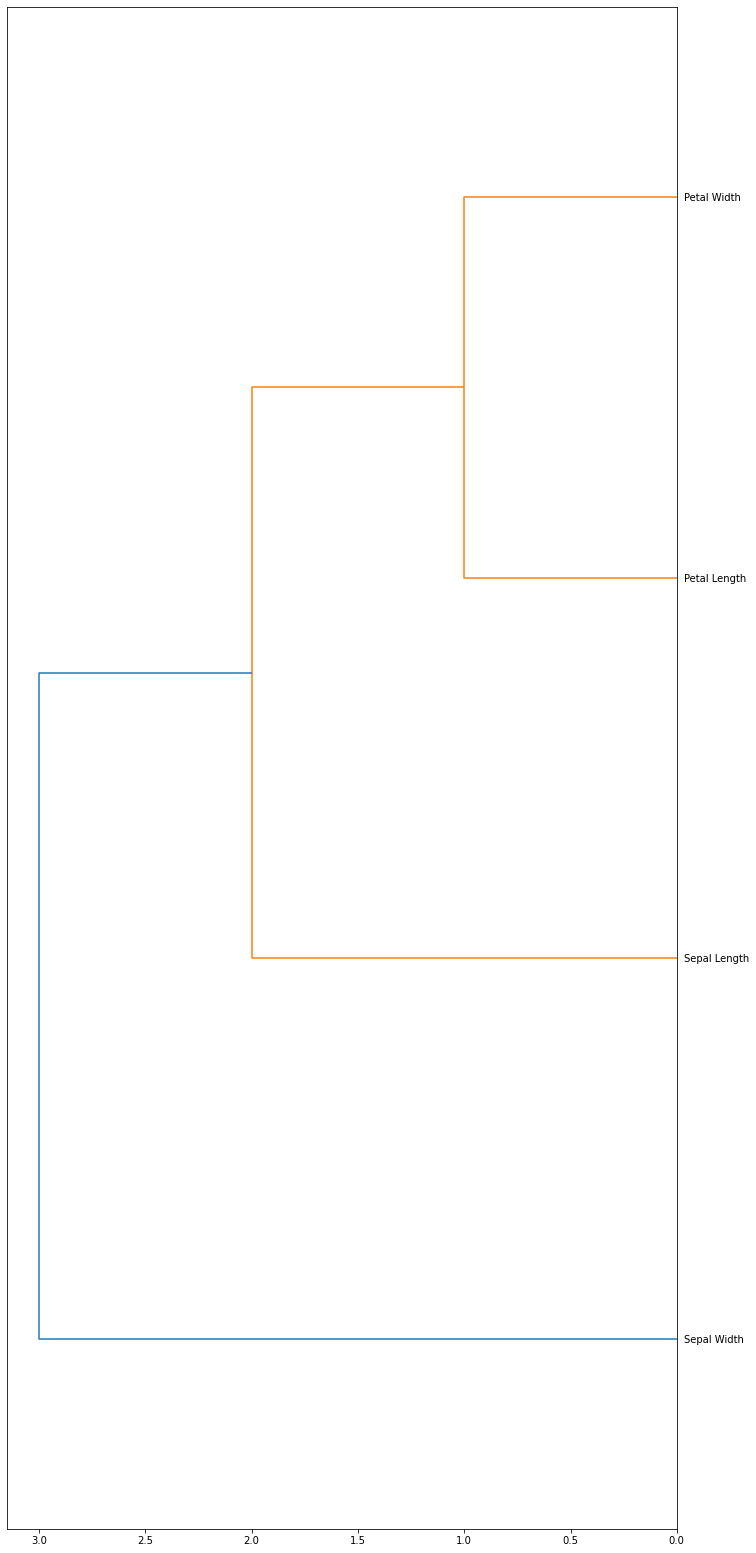

In [326]:
#1.2.2 - Petal Width and petal length are most similar. The feature that is most unlike the others is sepal width. 
model = AgglomerativeClustering(n_clusters = 3)
model = model.fit(final_df_two)
figure = plt.figure(figsize=(12, 28))
plot_dendrogram(model, orientation = "left", labels=final_df_two.columns.values, leaf_font_size=10)
plt.show()